In [80]:
# Instalar bibliotecas em uma celula jupyter
%pip install pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [87]:
df = pd.read_csv('performance_metrics.csv')

df.head()

,timestamp,endpoint,operation,ano_inicio,ano_fim,mes_inicio,mes_fim,tempo_total_segundos,tempo_scraping_segundos,tempo_processamento_segundos,numero_registros,sucesso,erro_descricao,id_consulta,thread_id,Biblioteca
0,2025-07-08T21:16:39.872370,/consultar,consulta_assincrona_inicio,2004,2023,JANEIRO,DEZEMBRO,0.001719,0.000000,0.0,0,True,NaN,340c47b7-3e87-4840-bc7c-681f99821878,MainThread,Selenium
1,2025-07-08T21:17:01.717038,/consultar,consulta_assincrona_ano,2004,2004,JANEIRO,DEZEMBRO,21.812042,21.812042,0.0,84,True,NaN,340c47b7-3e87-4840-bc7c-681f99821878,Thread-21 (_executar_consulta_sequencial),Selenium
2,2025-07-08T21:17:23.860617,/consultar,consulta_assincrona_ano,2005,2005,JANEIRO,DEZEMBRO,22.139813,22.139813,0.0,89,True,NaN,340c47b7-3e87-4840-bc7c-681f99821878,Thread-21 (_executar_consulta_sequencial),Selenium
3,2025-07-08T21:17:46.964871,/consultar,consulta_assincrona_ano,2006,2006,JANEIRO,DEZEMBRO,23.101121,23.101121,0.0,79,True,NaN,340c47b7-3e87-4840-bc7c-681f99821878,Thread-21 (_executar_consulta_sequencial),Selenium
4,2025-07-08T21:18:08.922812,/consultar,consulta_assincrona_ano,2007,2007,JANEIRO,DEZEMBRO,21.954373,21.954373,0.0,73,True,NaN,340c47b7-3e87-4840-bc7c-681f99821878,Thread-21 (_executar_consulta_sequencial),Selenium


In [88]:
# Unir todos os dados de uma consulta (a partir de um id_consulta) em uma linha
df_consultas = df.groupby('id_consulta').agg({
    'id_consulta': 'first',
    'tempo_total_segundos': 'max',
    'ano_inicio': 'first',
    'mes_inicio': 'first',
    'ano_fim': 'first',
    'mes_fim': 'first',
    'numero_registros': 'max',
    'Biblioteca': 'first',
}).reset_index(drop=True)

# Converter as colunas de ano e mês para uma coluna de data Mes/YYYY - Mes/YYYY
df_consultas['data_inicio'] = df_consultas['ano_inicio'].astype(str) + '-' + df_consultas['mes_inicio'].astype(str)
df_consultas['data_fim'] = df_consultas['ano_fim'].astype(str) + '-' + df_consultas['mes_fim'].astype(str) 
df_consultas['periodo'] = df_consultas['data_inicio'] + ' - ' + df_consultas['data_fim']

# Remover as colunas de ano e mês
df_consultas = df_consultas.drop(columns=['ano_inicio', 'mes_inicio', 'ano_fim', 'mes_fim', 'data_inicio', 'data_fim'])

# COnverter o tempo total de segundos para minutos e segundos
df_consultas['tempo_total_segundos'] = df_consultas['tempo_total_segundos'].apply(lambda x: x / 60 if x > 60 else x)
df_consultas['tempo_total_segundos'] = df_consultas['tempo_total_segundos'].apply(lambda x: round(x, 2))

# Converter para uma coluna de minutos
df_consultas['tempo_total_minutos'] = df_consultas['tempo_total_segundos'].apply(lambda x: f"{int(x)}:{int((x - int(x)) * 60):02d}")
df_consultas = df_consultas.drop(columns=['tempo_total_segundos'])

# Porém, da forma como está, o tempo total não é um número, mas sim uma string no formato "minutos:segundos".
# Para facilitar a análise, vamos converter essa coluna para o formato de minutos como float.
df_consultas['tempo_total_minutos'] = df_consultas['tempo_total_minutos'].apply(lambda x: float(x.split(':')[0]) + float(x.split(':')[1]) / 60)



df_consultas[df_consultas['periodo'] == '2003-JANEIRO - 2023-DEZEMBRO'].head()


,id_consulta,numero_registros,Biblioteca,periodo,tempo_total_minutos
5,35c1e827-82df-478f-b1e5-f087febd3378,1546,Selenium,2003-JANEIRO - 2023-DEZEMBRO,7.516667
11,8ed06d26-15fb-4def-943a-73bf49862b60,1566,Selenium,2003-JANEIRO - 2023-DEZEMBRO,7.550000
15,ad885ce0-b480-431e-a1c3-5d06ce14e602,1550,Selenium,2003-JANEIRO - 2023-DEZEMBRO,7.550000
16,b3f09d71-0f8f-4be7-8c3d-572ea13dc70b,1593,Selenium,2003-JANEIRO - 2023-DEZEMBRO,7.450000


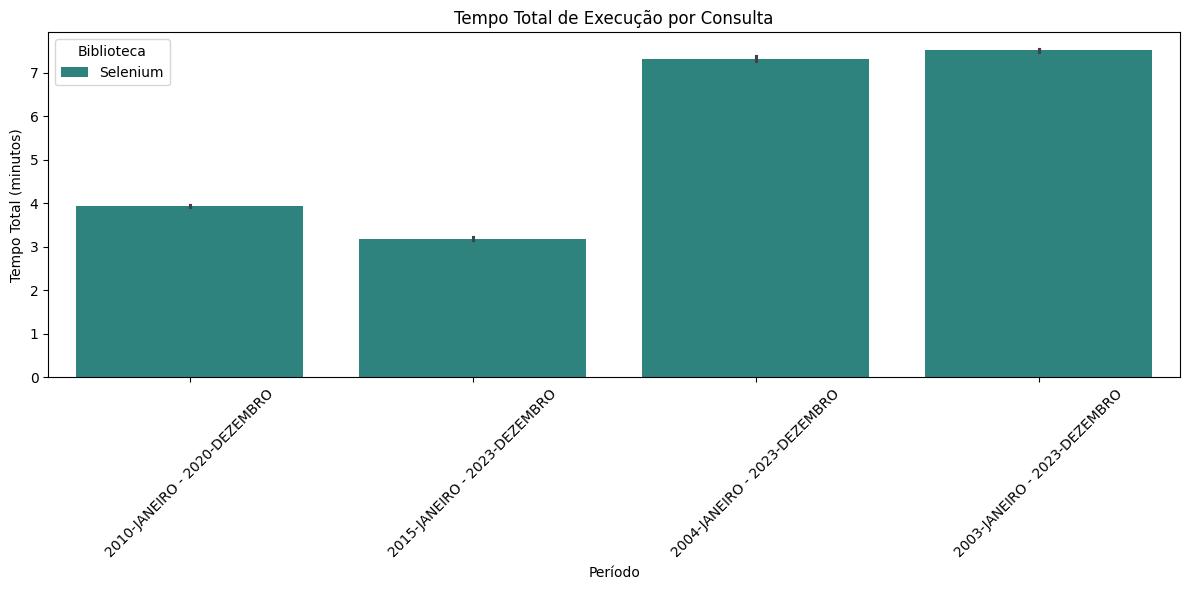

In [92]:
# Mostrar o tempo total de execução de cada consulta por periodo e biblioteca
plt.figure(figsize=(12, 6))
sns.barplot(x='periodo', y='tempo_total_minutos', hue='Biblioteca', data=df_consultas, palette='viridis')
plt.title('Tempo Total de Execução por Consulta')
plt.xlabel('Período')
plt.ylabel('Tempo Total (minutos)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Biblioteca', loc='upper left')
plt.show()

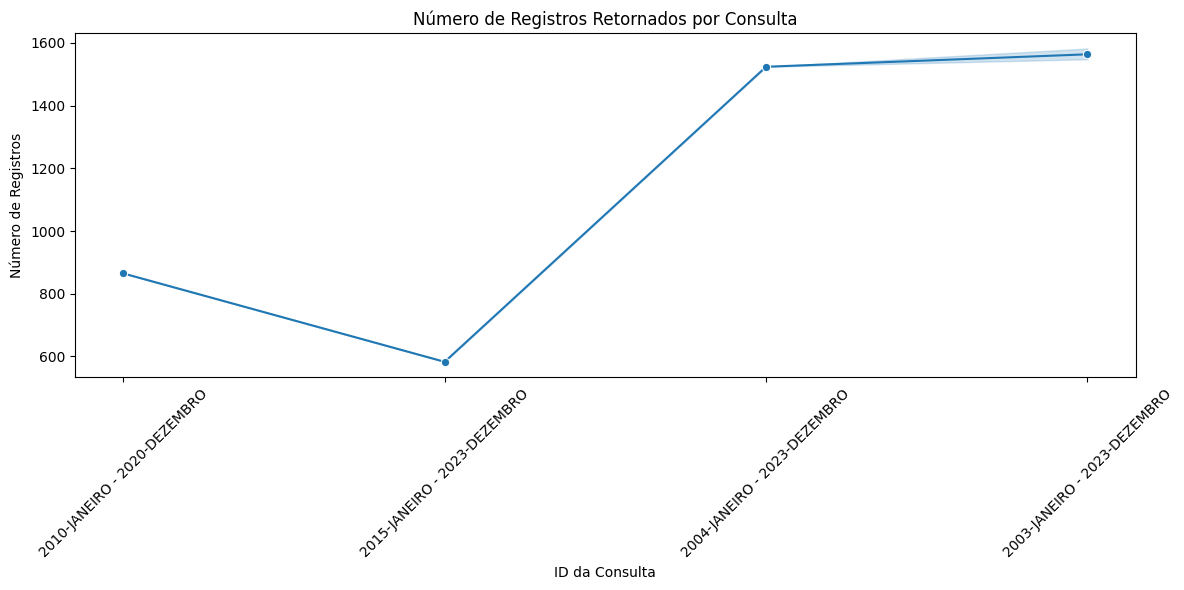

In [85]:
# Comparar numero de registros retornados por consulta mas sem ser barplot
plt.figure(figsize=(12, 6))
sns.lineplot(x='periodo', y='numero_registros', data=df_consultas, marker='o')
plt.title('Número de Registros Retornados por Consulta')
plt.xlabel('ID da Consulta')
plt.ylabel('Número de Registros')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()